# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [3]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar los datos
df = pd.read_csv('data/retailmax.csv')

# Mostrar primeras filas
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

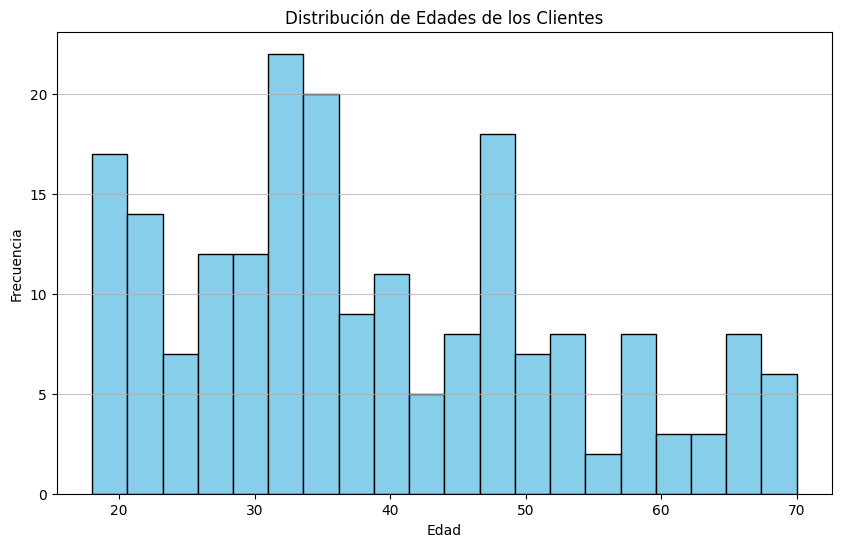

In [15]:
# Pregunta 1: Distribución de edades
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de los Clientes')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

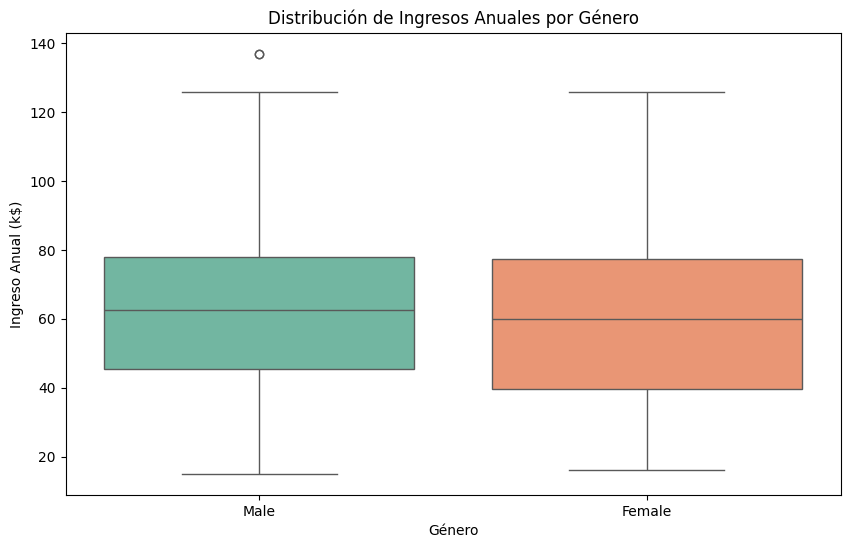


Estadísticas de Ingreso Anual por Género:
        count       mean        std   min    25%   50%    75%    max
Gender                                                              
Female  112.0  59.250000  26.011952  16.0  39.75  60.0  77.25  126.0
Male     88.0  62.227273  26.638373  15.0  45.50  62.5  78.00  137.0


In [6]:
# Pregunta 2: Diferencias en ingresos anuales entre géneros
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)', palette='Set2')
plt.xlabel('Género')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Distribución de Ingresos Anuales por Género')
plt.show()

# Estadísticas por género
print("\nEstadísticas de Ingreso Anual por Género:")
print(df.groupby('Gender')['Annual Income (k$)'].describe())

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

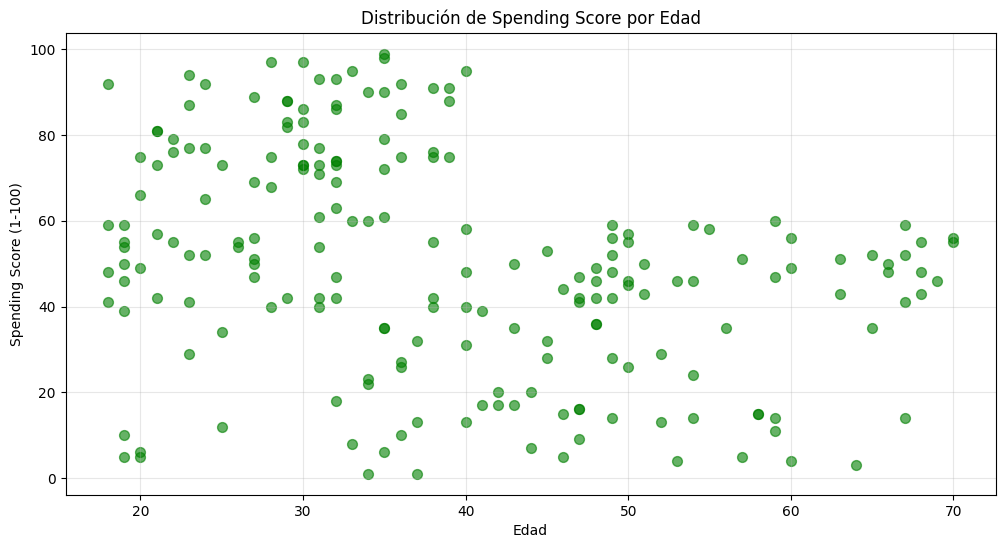

In [16]:
# Pregunta 3: Distribución de Spending Score por rangos de edad
# Crear grupos de edad para análisis posterior
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], 
                          labels=['18-25', '26-35', '36-45', '46-55', '56+'])

plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], alpha=0.6, color='green', s=50)
plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.title('Distribución de Spending Score por Edad')
plt.grid(True, alpha=0.3)
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

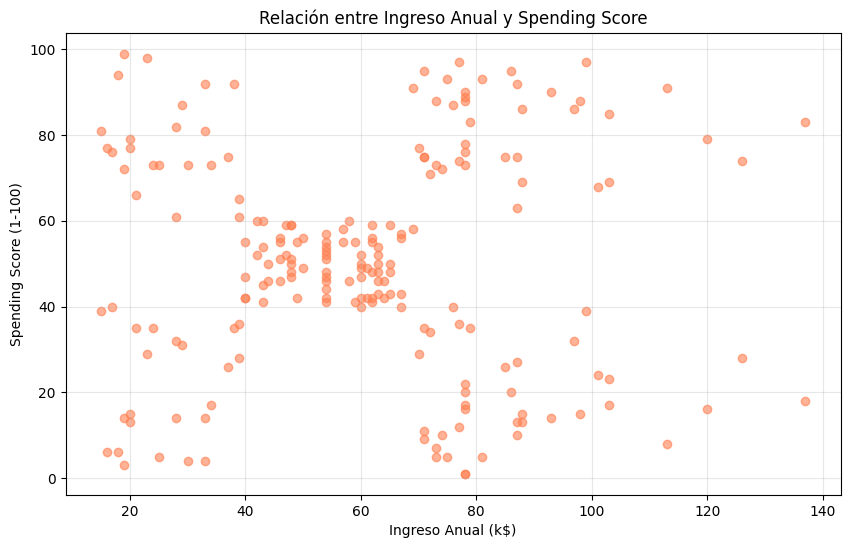


Coeficiente de correlación: 0.0099


In [8]:
# Pregunta 4: Correlación entre ingreso anual y spending score
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6, color='coral')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Relación entre Ingreso Anual y Spending Score')
plt.grid(True, alpha=0.3)
plt.show()

# Calcular coeficiente de correlación
correlation = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f"\nCoeficiente de correlación: {correlation:.4f}")

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

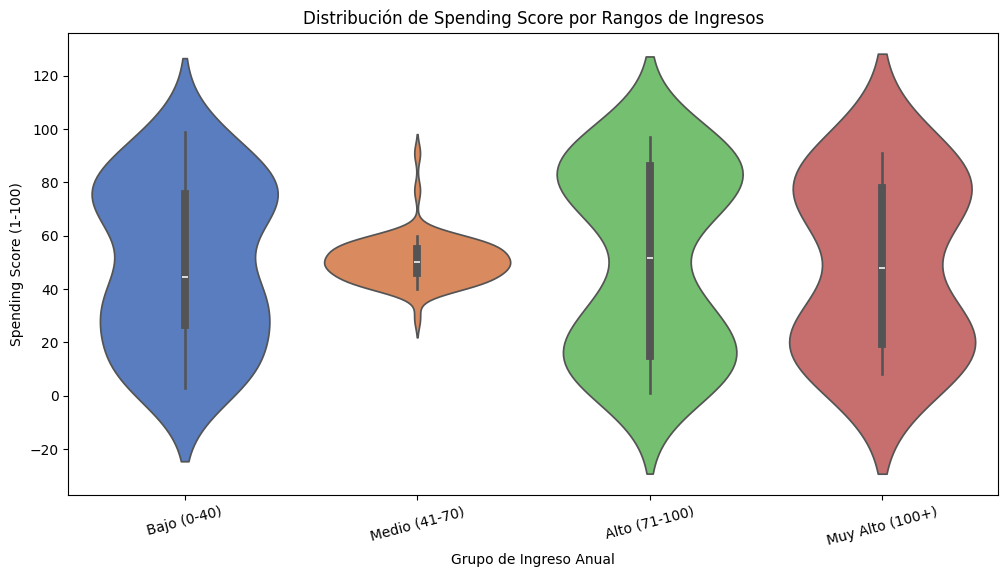

In [9]:
# Pregunta 5: Spending Score por rangos de ingresos
# Crear grupos de ingresos
df['Income_Group'] = pd.cut(df['Annual Income (k$)'], 
                             bins=[0, 40, 70, 100, 150], 
                             labels=['Bajo (0-40)', 'Medio (41-70)', 'Alto (71-100)', 'Muy Alto (100+)'])

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Income_Group', y='Spending Score (1-100)', palette='muted')
plt.xlabel('Grupo de Ingreso Anual')
plt.ylabel('Spending Score (1-100)')
plt.title('Distribución de Spending Score por Rangos de Ingresos')
plt.xticks(rotation=15)
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

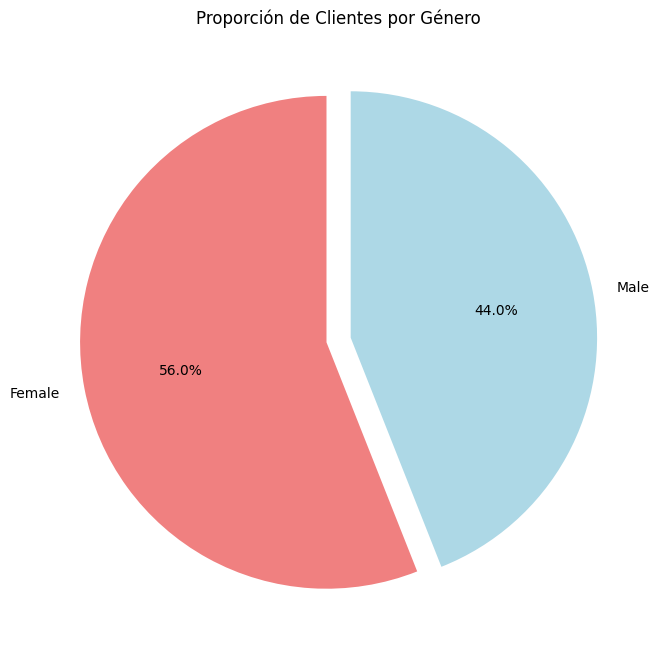


Total de clientes: 200
Mujeres: 112 (56.0%)
Hombres: 88 (44.0%)


In [17]:
# Pregunta 6: Proporción de clientes por género
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue'], startangle=90, explode=(0.05, 0.05))
plt.title('Proporción de Clientes por Género')
plt.show()

print(f"\nTotal de clientes: {len(df)}")
print(f"Mujeres: {gender_counts.get('Female', 0)} ({gender_counts.get('Female', 0)/len(df)*100:.1f}%)")
print(f"Hombres: {gender_counts.get('Male', 0)} ({gender_counts.get('Male', 0)/len(df)*100:.1f}%)")

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

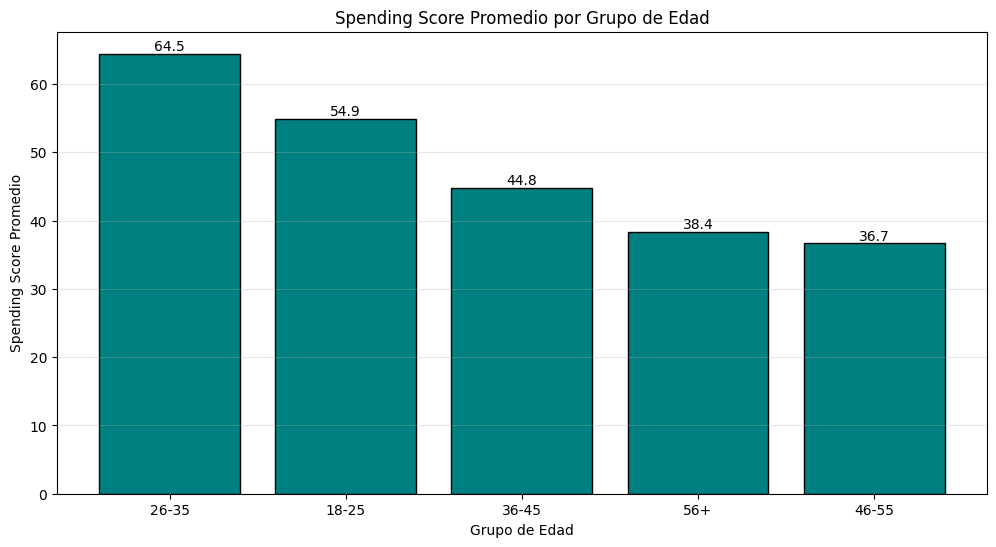


Spending Score Promedio por Grupo de Edad:
Age_Group
26-35    64.450000
18-25    54.947368
36-45    44.833333
56+      38.379310
46-55    36.702703
Name: Spending Score (1-100), dtype: float64


In [11]:
# Pregunta 7: Grupos de edad que gastan más en promedio
avg_spending_by_age = df.groupby('Age_Group')['Spending Score (1-100)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(avg_spending_by_age.index, avg_spending_by_age.values, color='teal', edgecolor='black')
plt.xlabel('Grupo de Edad')
plt.ylabel('Spending Score Promedio')
plt.title('Spending Score Promedio por Grupo de Edad')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom')

plt.show()

print("\nSpending Score Promedio por Grupo de Edad:")
print(avg_spending_by_age)

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

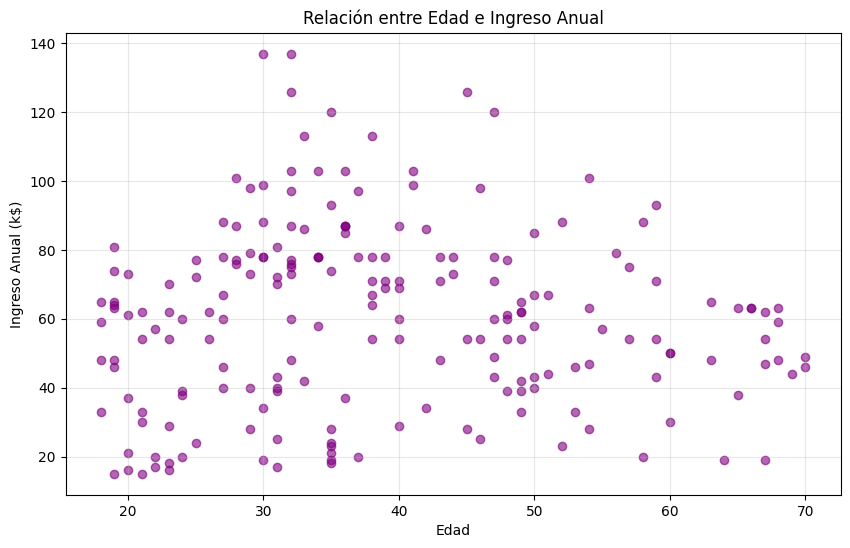


Coeficiente de correlación entre Edad e Ingreso Anual: -0.0124


In [12]:
# Pregunta 8: Relación entre edad e ingreso anual
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], alpha=0.6, color='purple')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Relación entre Edad e Ingreso Anual')
plt.grid(True, alpha=0.3)
plt.show()

# Calcular correlación
correlation_age_income = df['Age'].corr(df['Annual Income (k$)'])
print(f"\nCoeficiente de correlación entre Edad e Ingreso Anual: {correlation_age_income:.4f}")

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

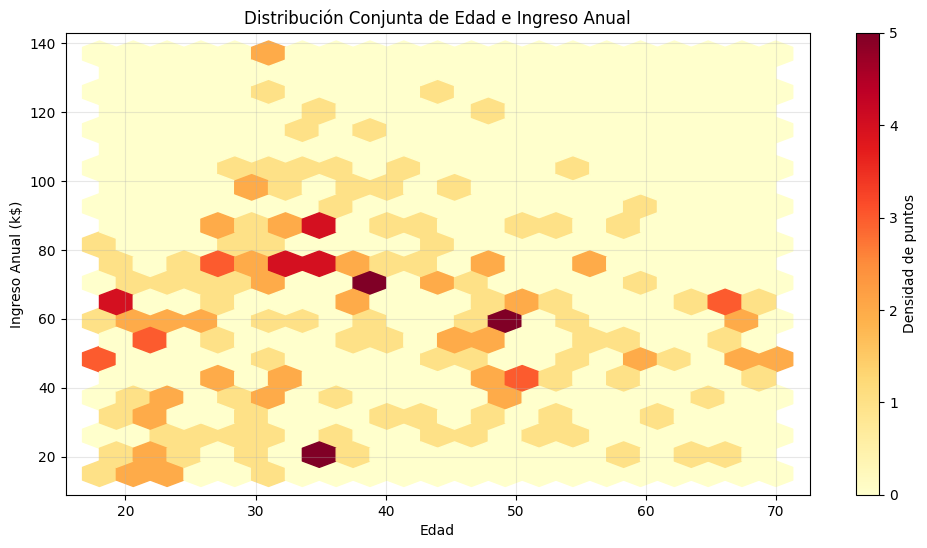

In [13]:
# Pregunta 9: Distribución conjunta de edad e ingreso anual
plt.figure(figsize=(12, 6))

# Gráfica de hexágonos para densidad
plt.hexbin(df['Age'], df['Annual Income (k$)'], gridsize=20, cmap='YlOrRd')
plt.colorbar(label='Densidad de puntos')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Distribución Conjunta de Edad e Ingreso Anual')
plt.grid(True, alpha=0.3)
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

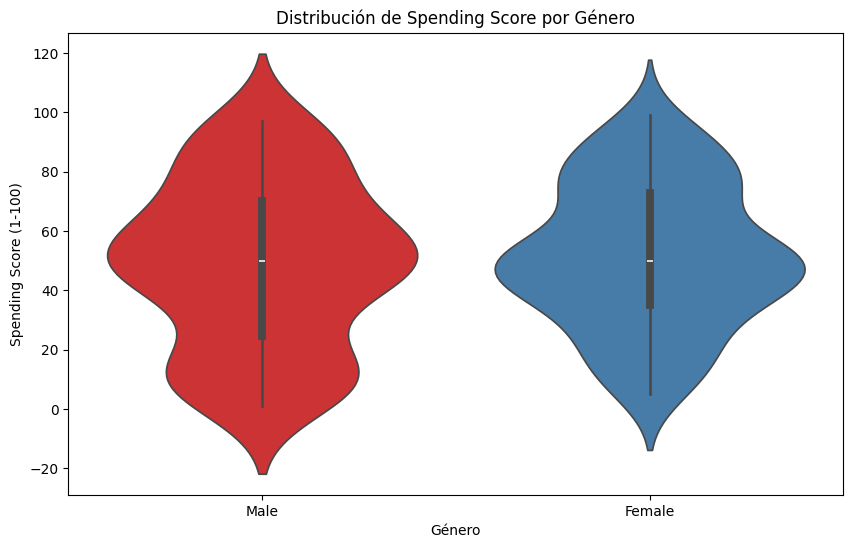


Estadísticas de Spending Score por Género:
        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


In [18]:
# Pregunta 10: Distribución de Spending Score por género
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set1')
plt.xlabel('Género')
plt.ylabel('Spending Score (1-100)')
plt.title('Distribución de Spending Score por Género')
plt.show()

print("\nEstadísticas de Spending Score por Género:")
print(df.groupby('Gender')['Spending Score (1-100)'].describe())